## Task: Game Platform Preference

You are interested in creating your own video game. Analyze a dataset from IGN which ranks the different platforms and game types.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete!')

Setup Complete!


### Load and Review Data

For this analysis we will use the: `data/ign_scores.csv`

- Use the `Platform` column as index.

In [5]:
file_path = '../data/seaborData/ign_scores.csv'
ign_df = pd.read_csv(file_path, index_col = 'Platform')

# Print head
ign_df.head()

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000


### Task: Which Platform is Best?

Create a `bar chart` that shows the average score for `racing` games, for each platform.

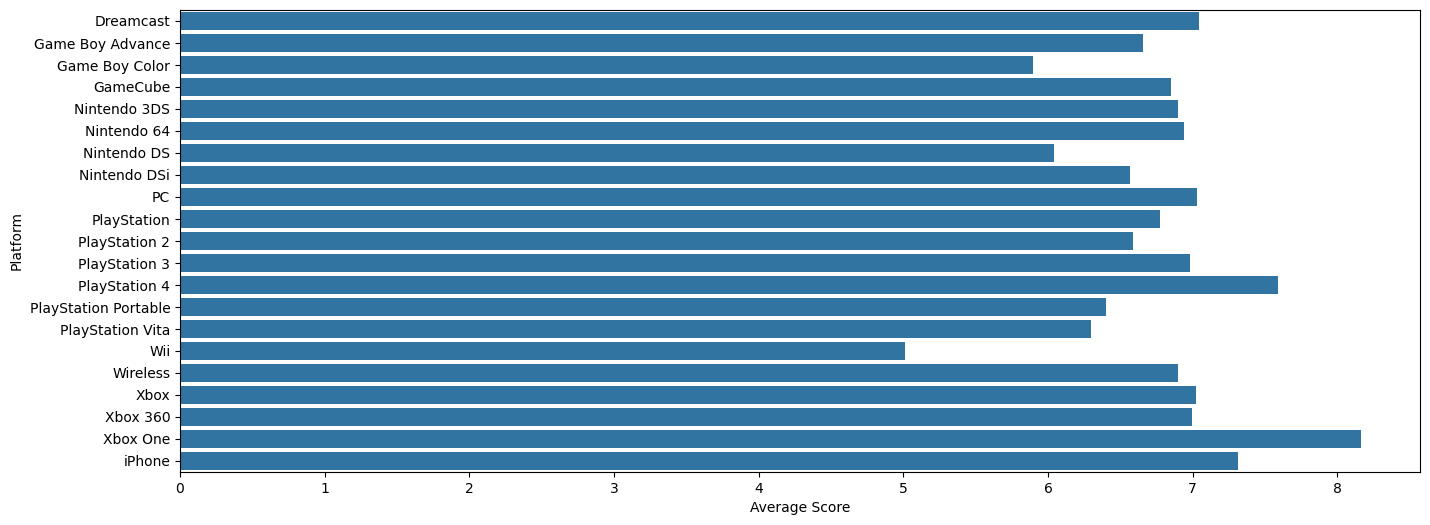

In [15]:
# Reset the index to make 'Platform' a column
ign_df = ign_df.reset_index()

# Now you can access 'Platform' as a column
plt.figure(figsize=(16, 6))
plt.xlabel('Average Score')
plt.ylabel('Platform')

# Plot horizontal bar plot
sns.barplot(x=ign_df['Racing'], y=ign_df['Platform'], orient='h')

# Display the plot
plt.show()

### Task: Which one is the Best One for Racing Games?

If `Wii` platform is not the best, which platform is?

In [7]:
platform_high_score = ign_df['Racing'].idxmax()
print(f'Platform with the highest average score for a racing game is {platform_high_score}.')

Platform with the highest average score for a racing game is Xbox One.


### Task: All Possible Combinations

Create a Heatmap of the average scores by genre in each cell

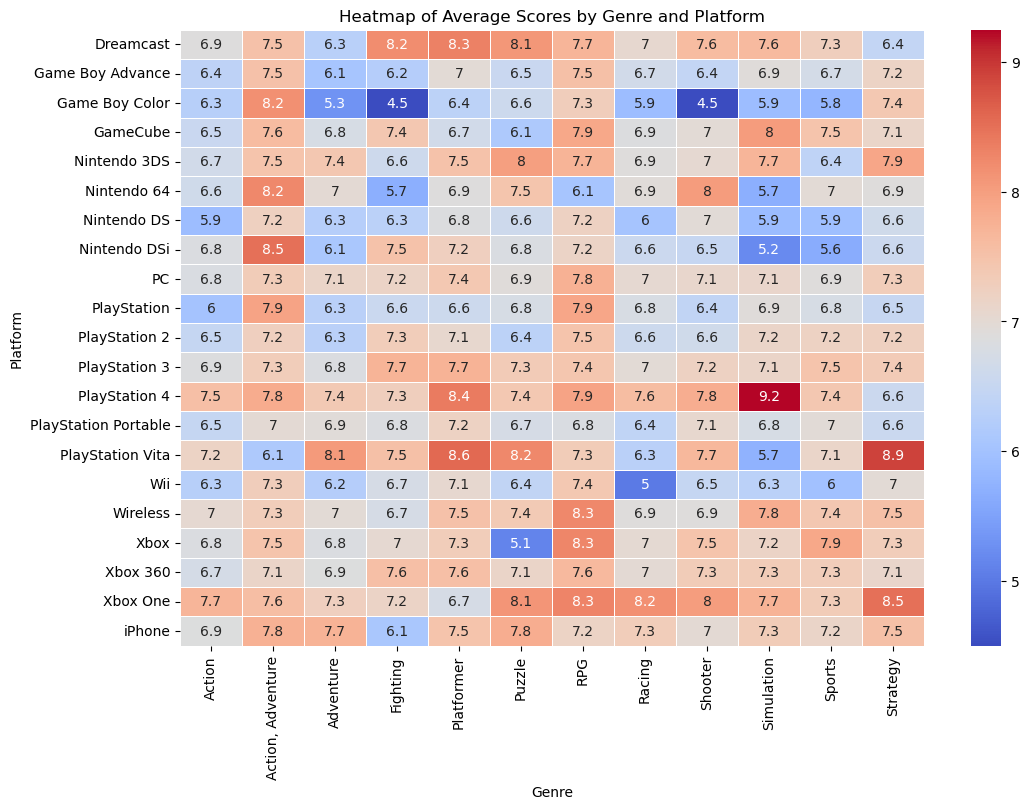

In [19]:
# Ensure that the platform names are the index
ign_df = ign_df.set_index('Platform')

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Plot the heatmap using seaborn, using only the numeric data
sns.heatmap(ign_df, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the plot labels and title
plt.title('Heatmap of Average Scores by Genre and Platform')
plt.xlabel('Genre')
plt.ylabel('Platform')

# Display the plot
plt.show()

### Task: Which Combination is Best?

- Which combination of `genre` and `platform` receives the `highest` ratings?
- Which combination receives the `lowest` average rating?

In [20]:
# Variables to store highest and lowest combinations and their values
highest_combination_value = 0
highest_combination = 0
lowest_combination_value = 0
lowest_combination = 0

# Find the maximum value and its location (platform and genre)
highest_combination_value = ign_df.max().max()  # Get the highest value (rating)
highest_combination = ign_df.stack().idxmax()  # Get the (platform, genre) combination for the max

# Find the minimum value and its location (platform and genre)
lowest_combination_value = ign_df.min().min()  # Get the lowest value (rating)
lowest_combination = ign_df.stack().idxmin()  # Get the (platform, genre) combination for the min

# Print the results
print(f'Highest combination is {highest_combination} with a rating of {highest_combination_value}.')
print(f'Lowest combination is {lowest_combination} with a rating of {lowest_combination_value}.')

Highest combination is ('PlayStation 4', 'Simulation') with a rating of 9.25.
Lowest combination is ('Game Boy Color', 'Fighting') with a rating of 4.5.


## Scatter Plots

### Load the Dataset
We will use a (synthetic) dataset of medical insurance charges: `data/insurance.csv`

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete!')

# Load Data
file_path = '../data/seaborData/insurance.csv'
insurance_df = pd.read_csv(file_path)

# Top Records
insurance_df.head()

Setup Complete!


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Create a `scatter` plot. In seaborn use `sns.scatterplot` command.
- X-axis use `bmi`.
- Y-axis use `charges`.

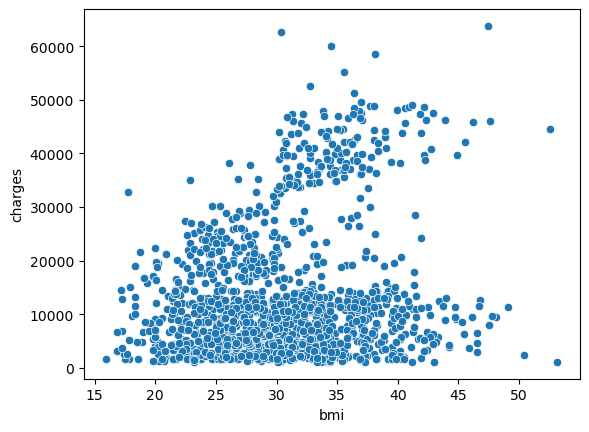

In [22]:
sns.scatterplot(x = insurance_df['bmi'], y = insurance_df['charges'])
plt.show()

The plot suggests we have a `positive correlation` between BMI and Charges.
-Higher BMI tends to pay more.

To double check the strength of this relationship, add a `regression line` that best fits the data.

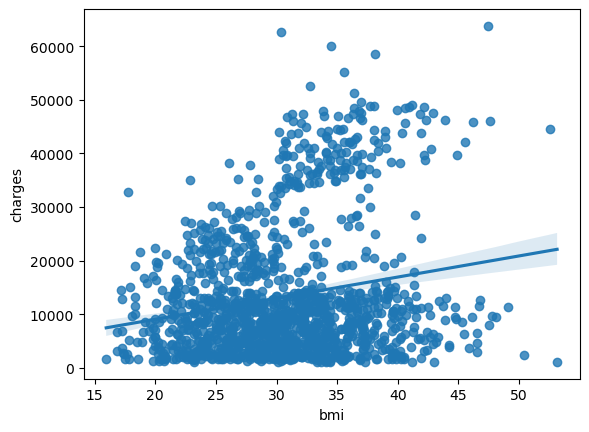

In [23]:
sns.regplot(x = insurance_df['bmi'], y = insurance_df['charges'])
plt.show()

### Color-Coded Scatter Plots
They are good when you need to display the correlation between not two, but more variables.

We want to understand how `smoker` affects the relationship between `bmi` and `charges`.

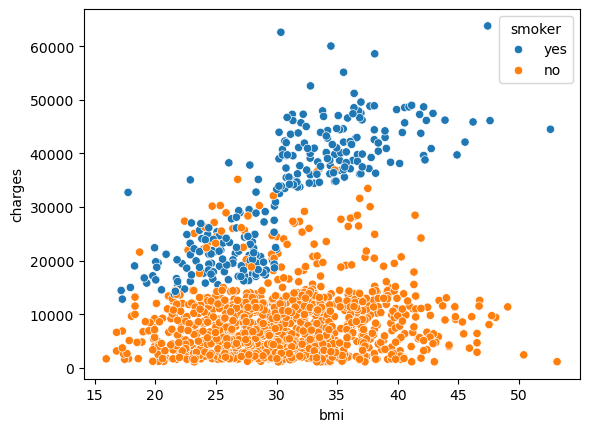

In [25]:
# Scatter plot of bmi vs charges AND smoker vs charges
# x = bmi, y = charges, hue = smoker.
sns.scatterplot(x = insurance_df['bmi'], y = insurance_df['charges'], hue = insurance_df['smoker'])
plt.show()

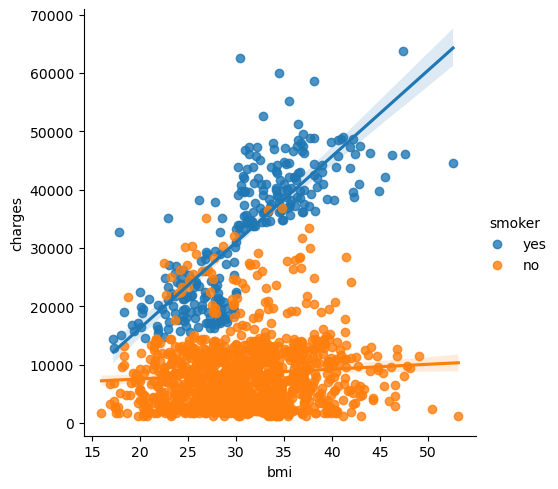

In [27]:
# Add two regression lines
# When using lmplot for three or more, only use the column name
sns.lmplot(data = insurance_df ,x = 'bmi', y = 'charges', hue = 'smoker')
plt.show()

Finally, we can adapt the design of the scatter plot to feature a `categorical variable` (like 'smoke') on one of the main axis. Some people call this plot: **Categorical Scatter Plot**

c:\Users\luksh\anaconda3\envs\CS4580\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\luksh\anaconda3\envs\CS4580\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


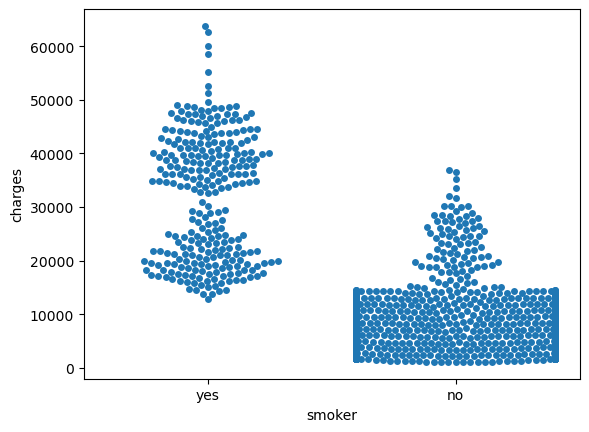

In [28]:
sns.swarmplot(x = insurance_df['smoker'], y = insurance_df['charges'])
plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete!')

Setup Complete!


## Task: Candy Preferences

Analyze a candy survey dataset: `../data/seaborData/candy.csv` for favorite candies.

### Setup and Load Data

In [32]:
# Load Data
file_path = '../data/seaborData/candy.csv'
candy_df = pd.read_csv(file_path, index_col='id')

# Top Records
candy_df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


In [33]:
# Get the size
print(candy_df.shape)

(83, 13)


### Task: Popularity

- Which candy, '3 Musketeers' or 'Almond Joy' was more popular?
- Which one has more sugar?

Create a scatter plot that shows the correaltion between `sugarpercent`(x-axis) and `winpercent`(y - axis).

Does the plot show a **strong** correlation between the two variables?
If so, are candies with more sugar relatively more or less popular with survey data?